In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Loan_prediction.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
total = len(df)

In [6]:
yes = len(df[df['Loan_Status'] == 'Y'])

In [7]:
p_of_A = yes/total

In [8]:
p_of_A

0.6872964169381107

<br><br><br>

	•	Store the total number of houses as total which is the length of the dataset
	•	Calculate p_of_urban, which is the probability of the house being in urban area by first appplying a Boolean condition df['Property_Area] == 'Urban' and calculate its sum. Then divide the sum by total calculate p_of_urban
	•	In a similar manner calculate the probability of house being in SemiUrban area and store it as p_of_semiurban. The value inside the Boolean condition is now Semiurban
	•	Calculate the probability of house being either in Urban or SemiUrban area and stor the vale in p_of_or. Print the value to check your answer.
	•	Add both p_of_urban and p_of_semiurban and store it as pofor and print it out to check your result



In [9]:
def count_property_area(dataframe, property_area):
    count = (dataframe['Property_Area'] == property_area).sum()
    total = len(dataframe)
    probability = count/total
    return probability

In [10]:
p_of_urban = count_property_area(df, 'Urban')

In [11]:
p_of_semiurban = count_property_area(df, 'Semiurban') 

In [12]:
p_of_urban,p_of_semiurban 

(0.3289902280130293, 0.3794788273615635)

In [13]:
p_of_or = (len(df[(df['Property_Area'] == 'Urban') | (df['Property_Area'] == 'Semiurban')]))/len(df)

In [14]:
print(p_of_or)

0.7084690553745928


In [15]:
pofor = p_of_urban + p_of_semiurban

In [16]:
print(pofor)

0.7084690553745928


<br><br><br>

	•	Convert the Gender column in a numpy array and store the same in variable g
	•	Convert the Loan_Status column in a numpy array and store the same in variable l
	•	Create a table named table using crosstab() method from pandas. Pass g and l as arguments and print the same
	•	Calculate the probability of loan approval when we know that the applicant is male. Store the value in 'p_of_ymale'
	•	Print the results to check the answer to the question


In [17]:
g = df.iloc[ : , 1].values

l = df.iloc[ : , -1].values

table = pd.crosstab(g, l)

print(table)

p_of_ymale = table.loc['Male', 'Y'] / table.loc['Male'].sum()

p_of_yfemale = table.loc['Female', 'Y'] / table.loc['Female'].sum()

col_0     N    Y
row_0           
Female   37   75
Male    150  339


In [18]:
p_of_yfemale

0.6696428571428571

<br><br><br>
<p>
    <strong>
Independence check !
To calculate the joint probability it's very important that conditions are idependent from each other. Les's check whether the condition fico credit score is greater than 700 and purpose == 'debt_consolidation' are independent from each other.
</p>
<p>
Instructions:
	•	The path for the dataset file has been store in variable path<br>
	•	Load dataset using pandas read_csv api in variable df<br>
	•	Calculate the probability p(A)for the event that fico credit score is greater than 700. and store it in variable 'p_a'.<br>
	•	Calculate the probabilityp(B) for the event that purpose == 'debt_consolation' and store it in variable 'p_b'.<br>
	•	Calculate the purpose == 'debt_consolidation' and store it in dataframe df1.<br>
	•	Calculate the probablityp(B|A) for the event purpose == 'debt_consolidation' given 'fico' credit score is greater than 700 and store it in variable p_a_b.<br>
	•	formula to check the independency P(A|B) == P(A)<br>
	•	check the independency store it in variable result.<br>
	•	Print result<br>
</strong></p>
<br><br><br>

In [40]:
a, b = 'fico credit > 700', 'purpose == debt_consolation'

In [41]:
a, b

('fico credit > 700', 'purpose == debt_consolation')

In [19]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Cleaned_Loan_prediction.csv'
df = pd.read_csv(path)

df.head()

p_a = len(df[df.loc[ : , 'fico'] > 700]) / len(df)

p_b = len(df[df.loc[ : , 'purpose'] == 'debt_consolidation']) / len(df)

df1 = df[df.loc[ : , 'purpose'] == 'debt_consolidation']

p_a_b = len(df1[df1['fico'] > 700]) / len(df1)

p_b_a = p_a_b * p_b / p_a

result = p_b_a == p_a

result

In [45]:
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [46]:
prob_lp = len(df[df['paid.back.loan'] == 'Yes']) / len(df)

prob_cs = len(df[df['credit.policy'] == 'Yes']) / len(df)

new_df = df[df['paid.back.loan'] == 'Yes']

prob_pd_cs = len(new_df[new_df['credit.policy'] == 'Yes'])/len(new_df)

prob_pd_cs, prob_lp, prob_cs

bayes = prob_pd_cs * prob_lp / prob_cs

bayes

In [58]:
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


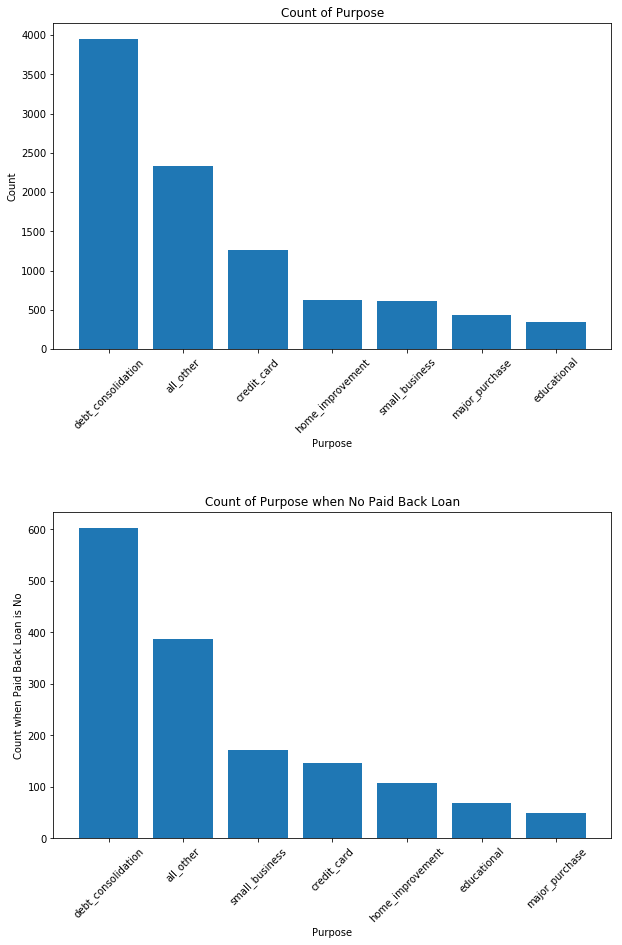

In [94]:
fig, (ax_1, ax_2) = plt.subplots(2, 1 , figsize = (10, 15))
plt.subplots_adjust(hspace= 0.5)

plt.sca(ax_1)
ax_1.bar(df['purpose'].value_counts().index, df['purpose'].value_counts().values)
plt.xticks(rotation = 45)
ax_1.set(xlabel = 'Purpose', ylabel = 'Count', title = 'Count of Purpose')


plt.sca(ax_2)
df1 = df[df['paid.back.loan'] == 'No']
ax_2.bar(df1['purpose'].value_counts().index, df1['purpose'].value_counts().values)
plt.xticks(rotation = 45)
ax_2.set(xlabel = 'Purpose', ylabel = 'Count when Paid Back Loan is No', title = 'Count of Purpose when No Paid Back Loan')

plt.show()

In [99]:
inst_median, inst_mean = df['installment'].median(), df['installment'].mean()

(array([212., 425., 639., 576., 812., 755., 593., 619., 537., 544., 661.,
        284., 406., 205., 201., 397., 319., 142., 100.,  92., 157., 274.,
        111.,  34.,  39., 117., 148., 118.,  47.,  14.]),
 array([ 15.67      ,  46.48566667,  77.30133333, 108.117     ,
        138.93266667, 169.74833333, 200.564     , 231.37966667,
        262.19533333, 293.011     , 323.82666667, 354.64233333,
        385.458     , 416.27366667, 447.08933333, 477.905     ,
        508.72066667, 539.53633333, 570.352     , 601.16766667,
        631.98333333, 662.799     , 693.61466667, 724.43033333,
        755.246     , 786.06166667, 816.87733333, 847.693     ,
        878.50866667, 909.32433333, 940.14      ]),
 <a list of 30 Patch objects>)

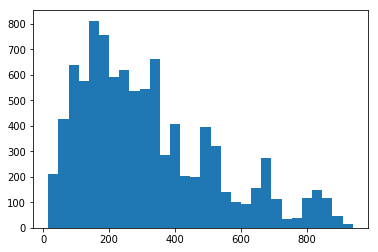

In [101]:
plt.hist(df['installment'], bins = 30)